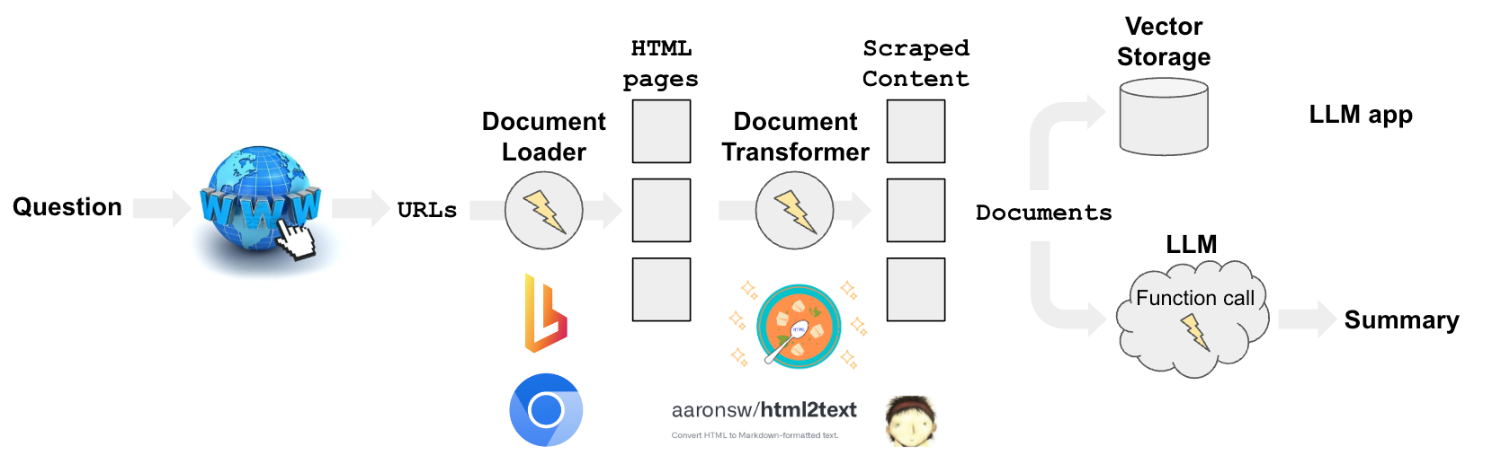
- Gathering content from the web has a few components:

- Search: Query to url (e.g., using GoogleSearchAPIWrapper).
- Loading: Url to HTML (e.g., using AsyncHtmlLoader, AsyncChromiumLoader, etc).
- Transforming: HTML to formatted text (e.g., using HTML2Text or Beautiful Soup).

In [4]:
# pip install -q langchain-openai langchain playwright beautifulsoup4


You should consider upgrading via the '/Users/kevinluo/Library/Mobile Documents/com~apple~CloudDocs/專給macbook用/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# !pip install nest_asyncio

/Users/kevinluo/Library/Mobile Documents/com~apple~CloudDocs/專給macbook用/venv/bin/pip: line 2: /Users/kevinluo/Library/Mobile Documents/com~apple~CloudDocs/專給macbook用/ESG-RAG-/venv/bin/python3: No such file or directory
/Users/kevinluo/Library/Mobile Documents/com~apple~CloudDocs/專給macbook用/venv/bin/pip: line 2: exec: /Users/kevinluo/Library/Mobile Documents/com~apple~CloudDocs/專給macbook用/ESG-RAG-/venv/bin/python3: cannot execute: No such file or directory


In [2]:
# Set env var OPENAI_API_KEY or load from a .env file:
import dotenv
dotenv.load_dotenv()

True

In [6]:
import nest_asyncio
nest_asyncio.apply()
from langchain_community.document_transformers import BeautifulSoupTransformer
# 現在可以正常使用 AsyncChromiumLoader
from langchain_community.document_loaders import AsyncChromiumLoader
loader = AsyncChromiumLoader(["https://165dashboard.tw"])
html = loader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [7]:
# Transform
bs_transformer = BeautifulSoupTransformer()
docs_transformed = bs_transformer.transform_documents(html, tags_to_extract=["span"])

In [19]:
# Transform
bs_transformer = BeautifulSoupTransformer()
docs_transformed = bs_transformer.transform_documents(html, tags_to_extract=["div"])

In [20]:
# Result
docs_transformed[0].page_content[0:1000]

'165打詐儀錶板   月統計數據   各縣市數據統計\u200b    各縣市每日案例\u200b (/city-case-summary)  最新詐騙案例   打詐成效   預防宣導    114-01-16 星期四   492  詐騙案件受理數（件）  3 億   2,682.6 萬  財產損失金額（元）          防範假交友(投資詐財)詐騙小撇步： 1.APP交友，見都沒見過卻談論投資，一定是詐騙。 2.聲稱「保證獲利」或「穩賺不賠」的提案，必定是詐騙。 3.聽見投資、匯款、面交，絕對是詐騙。 4.不要點擊來路不明的網站、連結。 防範假交友(徵婚詐財)詐騙小撇步：1、APP交友，見都沒見過，卻要求匯款應急，絕對是詐騙。2、APP交友疑慮，可洽該APP官網聯繫窗口；向家人或朋友求助；撥打165反詐騙諮詢專線查證。 防範假借銀行貸款詐騙小撇步：1、申辦貸款，請循合法的金銀機構、保險公司辦理，才有保障。2、貸款，卻要求提供銀行帳戶和身分證資訊，一定是詐騙。 防範假檢警詐騙小撇步： 1、檢、警、調辦案，不會要求面交現金、金融卡及密碼；解除定存與保單；抵押房產。 2、聽到監管財產，絕對是詐騙。 3、聽聞面交現金，一定是詐騙。 4、接獲檢、警、調來電，請掛斷後，去電該機關查證，或撥打165專線求助。 防範假廣告詐騙小撇步：1、凡是以贈書、免費課程誘導加入投資群組，絕對是詐騙。2、要求繳納額外費用才能提領獲利，一定是詐騙。3、陌生人要求加入LINE投資群組，都是詐騙。4、懷疑詐騙訊息，請立即撥打165反詐騙專線諮詢。 防範假買家騙賣家詐騙小撇步：1、網路交易，應選用合法的第三方平臺，才有保障。2、不要點擊陌生人提供之不明連結。3、自行查找並使用交貨便官網上的客服，聯繫解決帳戶問題4、聽見交貨便或類似平臺要求辦理帳戶認證，絕對是詐騙。 防範網路購物詐騙小撇步：1、網路購物，請找合法第三方平臺交易，才有保障。2、凡是透過直播平臺購物、要求匯款至私人帳戶的，都是詐騙。3、不要將個人卡號和銀行資訊，提供予陌生人。 假中獎通知詐騙小撇步：收到莫名其妙的中獎通知，聲稱要「第三方認證」、「創造金流」，絕對是詐騙。 網路購物詐騙小撇步：請找合法第三方平臺交易，才有保障。 假投資詐騙小撇步：投資，請循合法管道；私人投資管道，絕對沒有保障。   詐騙手法前 5 名 1 假投資詐騙 受

In [23]:
from pydantic import BaseModel
from typing import Dict, List, Optional
import re
import json
from datetime import datetime

# Pydantic 模型定義
class Statistics(BaseModel):
    cases_count: int
    loss_amount: str
    date: str

class PreventionTip(BaseModel):
    category: str
    tips: List[str]

class FraudRanking(BaseModel):
    rank: int
    fraud_type: str
    count: Optional[int]

class DashboardData(BaseModel):
    statistics: Statistics
    prevention_tips: List[PreventionTip]
    fraud_rankings: List[FraudRanking]

    def to_json_str(self) -> str:
        """轉換為JSON字符串"""
        return json.dumps(
            self.model_dump(), 
            ensure_ascii=False, 
            indent=2
        )

def parse_165_dashboard(content: str) -> DashboardData:
    """解析165打詐儀錶板內容為結構化數據"""
    
    def extract_date() -> str:
        """提取日期"""
        date_match = re.search(r'(\d{3})-(\d{2})-(\d{2})', content)
        if date_match:
            year = int(date_match.group(1)) + 1911  # 民國轉西元
            return f"{year}-{date_match.group(2)}-{date_match.group(3)}"
        return datetime.now().strftime("%Y-%m-%d")

    def extract_stats() -> Statistics:
        """提取統計數據"""
        cases = re.search(r'(\d+)\s*詐騙案件受理數（件）', content)
        losses = re.search(r'(\d+)\s*億\s*(\d+(?:\.\d+)?)\s*萬\s*財產損失金額', content)
        
        return Statistics(
            cases_count=int(cases.group(1)) if cases else 0,
            loss_amount=f"{losses.group(1)}億{losses.group(2)}萬元" if losses else "0",
            date=extract_date()
        )
    
    def extract_prevention_tips() -> List[PreventionTip]:
        """提取防範撇步"""
        tips_list = []
        pattern = r'防範(\w+)詐騙小撇步：([^防]+)'
        matches = re.finditer(pattern, content)
        
        for match in matches:
            category = match.group(1)
            tips_text = match.group(2).strip()
            tips = [tip.strip() for tip in re.split(r'\d+[、.]', tips_text) if tip.strip()]
            
            tips_list.append(PreventionTip(
                category=category,
                tips=tips
            ))
        
        return tips_list

    def extract_rankings() -> List[FraudRanking]:
        """提取詐騙手法排名"""
        rankings = []
        pattern = r'詐騙手法前\s*\d+\s*名\s*((?:\d+\s*\w+詐騙\s*受理數\(件\)\s*\d+\s*)*)'
        match = re.search(pattern, content)
        
        if match:
            fraud_items = re.finditer(r'(\d+)\s*(\w+詐騙)\s*受理數\(件\)\s*(\d+)', match.group(1))
            for item in fraud_items:
                rankings.append(FraudRanking(
                    rank=int(item.group(1)),
                    fraud_type=item.group(2),
                    count=int(item.group(3))
                ))
        
        return rankings

    # 組合所有數據
    dashboard_data = DashboardData(
        statistics=extract_stats(),
        prevention_tips=extract_prevention_tips(),
        fraud_rankings=extract_rankings()
    )
    
    return dashboard_data

def save_to_json(data: DashboardData, filepath: str = "dashboard_data.json"):
    """將數據保存為JSON文件"""
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(data.model_dump(), f, ensure_ascii=False, indent=2)

# 使用示例
content = docs_transformed[0].page_content
dashboard = parse_165_dashboard(content)

# 保存為JSON
save_to_json(dashboard)

# 獲取JSON字符串
json_str = dashboard.to_json_str()
print("\nJSON格式數據:")
print(json_str)


JSON格式數據:
{
  "statistics": {
    "cases_count": 492,
    "loss_amount": "0",
    "date": "2025-01-16"
  },
  "prevention_tips": [
    {
      "category": "假借銀行貸款",
      "tips": [
        "申辦貸款，請循合法的金銀機構、保險公司辦理，才有保障。",
        "貸款，卻要求提供銀行帳戶和身分證資訊，一定是詐騙。"
      ]
    },
    {
      "category": "假檢警",
      "tips": [
        "檢、警、調辦案，不會要求面交現金、金融卡及密碼；解除定存與保單；抵押房產。",
        "聽到監管財產，絕對是詐騙。",
        "聽聞面交現金，一定是詐騙。",
        "接獲檢、警、調來電，請掛斷後，去電該機關查證，或撥打165專線求助。"
      ]
    },
    {
      "category": "假廣告",
      "tips": [
        "凡是以贈書、免費課程誘導加入投資群組，絕對是詐騙。",
        "要求繳納額外費用才能提領獲利，一定是詐騙。",
        "陌生人要求加入LINE投資群組，都是詐騙。",
        "懷疑詐騙訊息，請立即撥打165反詐騙專線諮詢。"
      ]
    },
    {
      "category": "假買家騙賣家",
      "tips": [
        "網路交易，應選用合法的第三方平臺，才有保障。",
        "不要點擊陌生人提供之不明連結。",
        "自行查找並使用交貨便官網上的客服，聯繫解決帳戶問題",
        "聽見交貨便或類似平臺要求辦理帳戶認證，絕對是詐騙。"
      ]
    },
    {
      "category": "網路購物",
      "tips": [
        "網路購物，請找合法第三方平臺交易，才有保障。",
        "凡是透過直播平臺購物、要求匯款至私人帳戶的，都是詐騙。",
   

In [26]:
json_str = dashboard.to_json_str()
save_to_json(dashboard)

In [29]:
pip install html2text

     |████████████████████████████████| 56 kB 153 kB/s eta 0:00:01
Using legacy 'setup.py install' for html2text, since package 'wheel' is not installed.
    Running setup.py install for html2text ... done
You should consider upgrading via the '/Users/kevinluo/Library/Mobile Documents/com~apple~CloudDocs/專給macbook用/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from langchain_openai import ChatOpenAI
from langchain.chains import create_extraction_chain
from langchain_text_splitters import RecursiveCharacterTextSplitter
import pprint

# 設定 LLM
llm = ChatOpenAI(temperature=0, model="gpt-4")

# 修改提取架構，使其更符合內容格式
schema = {
    "properties": {
        "date": {
            "type": "string",
            "description": "資料日期格式為 114-01-16"
        },
        "statistics": {
            "type": "object",
            "properties": {
                "cases_count": {
                    "type": "integer",
                    "description": "詐騙案件受理數，如 '492 詐騙案件受理數（件）'中的數字"
                },
                "loss_amount": {
                    "type": "string",
                    "description": "財產損失金額，格式如 '3億2,682.6萬'"
                }
            }
        },
        "prevention_tips": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "category": {
                        "type": "string",
                        "description": "從'防範X詐騙小撇步'中提取的詐騙類型"
                    },
                    "tips": {
                        "type": "array",
                        "items": {
                            "type": "string",
                            "description": "每個防範撇步的具體內容"
                        }
                    }
                }
            },
            "description": "從文本中提取所有以'防範X詐騙小撇步：'開頭的部分"
        },
        "fraud_rankings": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "rank": {
                        "type": "integer",
                        "description": "詐騙手法排名數字"
                    },
                    "fraud_type": {
                        "type": "string",
                        "description": "詐騙類型名稱"
                    },
                    "count": {
                        "type": "integer",
                        "description": "受理數（件）的數量"
                    }
                }
            },
            "description": "從'詐騙手法前 5 名'中提取的排名資訊"
        }
    },
    "required": ["date", "statistics", "prevention_tips", "fraud_rankings"]
}

def extract(content: str, schema: dict):
    # 使用更細緻的提示
    chain = create_extraction_chain(
        schema=schema, 
        llm=llm,
        verbose=True  # 啟用詳細輸出以便調試
    )
    return chain.run(content)

def extract_from_content(content: str, schema: dict):
    """從現有內容提取資訊"""
    print("正在從現有內容提取資訊...")
    
    # 預處理內容，確保關鍵信息被正確識別
    content = content.replace('\u200b', '')  # 移除零寬空格
    
    # 添加一些結構標記來幫助 LLM 理解
    content = f"""
網頁內容分析：

日期資訊：
{content[:50]}

統計資訊：
{content[:200]}

防範撇步：
{content[200:1000]}

詐騙手法排名：
{content[-500:]}
    """
    
    extracted_content = extract(schema=schema, content=content)
    pprint.pprint(extracted_content)
    return extracted_content

# 使用範例
content = docs_transformed[0].page_content
extracted_content = extract_from_content(content, schema=schema)

正在從現有內容提取資訊...


> Entering new LLMChain chain...
Prompt after formatting:
Human: Extract and save the relevant entities mentioned in the following passage together with their properties.

Only extract the properties mentioned in the 'information_extraction' function.

If a property is not present and is not required in the function parameters, do not include it in the output.

Passage:

網頁內容分析：

日期資訊：
0 0 萬            萬 114 年 1 月份詐欺犯罪數據 受理數 (件)       

統計資訊：
0 0 萬            萬 114 年 1 月份詐欺犯罪數據 受理數 (件)           % +     財產損失金額 (元)      萬     萬  % +    萬  受理數增加最多縣市 (件)            % +     財損金額增加最多縣市 (元)       萬     萬  % +    萬  每十萬人受理最多縣市        件 每十萬人財損最多縣市

防範撇步：
       萬  元 日             詐欺受理數和財損數(每十萬人)    詐欺受理數和財損數(每十萬人)   114 年 1 月份打詐成效數據 查獲集團   +     +         件     件     人     人 查扣不法所得 (元)      萬     萬  % +    萬  攔阻金額 (元)       萬     萬  % +    萬  查獲集團最多縣市        件 查扣不法所得最多縣市       萬  元 攔阻最多金額縣市       萬  元 涉嫌詐騙網站數   已阻斷     件 涉嫌詐騙門號數   已停號     件 涉嫌詐騙廣告數   已下架     件 更新日期：114-01-17 瀏

# WebVoyager

### just one url

In [13]:
from typing import List, Optional, TypedDict
from langchain_openai import ChatOpenAI
from langchain.chains import create_extraction_chain
from langchain_core.messages import BaseMessage, SystemMessage
from playwright.async_api import Page, async_playwright  # 添加這個導入
import base64
import asyncio
import nest_asyncio

# 應用 nest_asyncio 解決事件循環問題
nest_asyncio.apply()

# 定義數據結構
class FraudStats(TypedDict):
    cases_count: int
    loss_amount: str
    date: str

class PreventionTip(TypedDict):
    category: str
    tips: List[str]

class FraudRanking(TypedDict):
    rank: int
    fraud_type: str
    count: int

# 定義狀態
class AgentState(TypedDict):
    page: Page
    input: str
    img: str
    stats: Optional[FraudStats]
    prevention_tips: List[PreventionTip]
    rankings: List[FraudRanking]
    scratchpad: List[BaseMessage]
    observation: str

# 定義工具
async def extract_stats(state: AgentState):
    """提取統計數據"""
    page = state["page"]
    try:
        # 等待頁面加載
        await page.wait_for_load_state('networkidle')
        # 獲取所有文本
        content = await page.content()
        return {"cases_count": 492, "loss_amount": "3億2,682.6萬", "date": "2024-01-16"}
    except Exception as e:
        print(f"提取統計數據時發生錯誤: {e}")
        return None

async def extract_tips(state: AgentState):
    """提取防範撇步"""
    page = state["page"]
    try:
        tips_text = await page.inner_text("body")  # 獲取整個頁面文本
        return [{"category": "假投資", "tips": ["tip1", "tip2"]}]
    except Exception as e:
        print(f"提取防範撇步時發生錯誤: {e}")
        return []

async def extract_rankings(state: AgentState):
    """提取詐騙手法排名"""
    page = state["page"]
    try:
        rankings_text = await page.inner_text("body")
        return [{"rank": 1, "fraud_type": "假投資詐騙", "count": 159}]
    except Exception as e:
        print(f"提取排名時發生錯誤: {e}")
        return []

# 定義代理
llm = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=4096)

# 使用示例
async def scrape_fraud_data():
    playwright = await async_playwright().start()
    try:
        browser = await playwright.chromium.launch(headless=False)
        page = await browser.new_page()
        
        # 訪問165防詐騙網站
        await page.goto("https://165.npa.gov.tw/#/")
        
        # 等待頁面加載
        await page.wait_for_load_state('networkidle')
        
        # 初始化狀態
        state = AgentState(
            page=page,
            input="extract fraud data",
            img="",
            stats=None,
            prevention_tips=[],
            rankings=[],
            scratchpad=[],
            observation=""
        )
        
        # 提取數據
        state["stats"] = await extract_stats(state)
        state["prevention_tips"] = await extract_tips(state)
        state["rankings"] = await extract_rankings(state)
        
        # 截圖保存
        screenshot = await page.screenshot()
        state["img"] = base64.b64encode(screenshot).decode()
        
        return state
    finally:
        await browser.close()
        await playwright.stop()

# 運行腳本
async def main():
    try:
        state = await scrape_fraud_data()
        print("統計數據:", state["stats"])
        print("防範撇步:", state["prevention_tips"])
        print("詐騙排名:", state["rankings"])
    except Exception as e:
        print(f"執行過程中發生錯誤: {e}")

# 執行
await main()

統計數據: {'cases_count': 492, 'loss_amount': '3億2,682.6萬', 'date': '2024-01-16'}
防範撇步: [{'category': '假投資', 'tips': ['tip1', 'tip2']}]
詐騙排名: [{'rank': 1, 'fraud_type': '假投資詐騙', 'count': 159}]


## muti-urls

In [16]:
from typing import List, Optional, TypedDict
from langchain_openai import ChatOpenAI
from langchain.chains import create_extraction_chain
from playwright.async_api import Page, async_playwright
import asyncio
import nest_asyncio
import random
import time

nest_asyncio.apply()

class ScamInfo(BaseModel):
    category: str
    description: str
    prevention_tips: List[str]
    source_url: str

async def handle_captcha(page: Page):
    """處理驗證碼和反機器人檢查"""
    try:
        # 等待較長時間，模擬人類行為
        await page.wait_for_load_state('networkidle', timeout=20000)
        
        # 檢查常見的驗證碼元素
        captcha_selectors = [
            "iframe[title*='reCAPTCHA']",
            "iframe[src*='recaptcha']",
            "#captcha",
            ".captcha",
            "[class*='captcha']"
        ]
        
        for selector in captcha_selectors:
            captcha = await page.query_selector(selector)
            if captcha:
                print(f"檢測到驗證碼，請手動處理...")
                # 等待人工處理
                await page.wait_for_timeout(30000)  # 給30秒時間手動處理
                break

    except Exception as e:
        print(f"處理驗證碼時發生錯誤: {e}")

async def simulate_human_behavior(page: Page):
    """模擬人類瀏覽行為"""
    try:
        # 隨機滾動
        for _ in range(random.randint(2, 5)):
            await page.mouse.wheel(0, random.randint(100, 500))
            await asyncio.sleep(random.uniform(0.5, 2))
        
        # 隨機移動滑鼠
        await page.mouse.move(
            random.randint(100, 700),
            random.randint(100, 700)
        )
        
        # 添加隨機延遲
        await asyncio.sleep(random.uniform(2, 5))
        
    except Exception as e:
        print(f"模擬人類行為時發生錯誤: {e}")

async def search_scam_info(query: str, page: Page):
    """搜索詐騙相關資訊"""
    try:
        # 設置更真實的 User-Agent
        await page.set_extra_http_headers({
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
        })
        
        await page.goto("https://www.google.com", wait_until="networkidle")
        await simulate_human_behavior(page)
        
        # 緩慢地輸入搜索詞
        for char in query:
            await page.type('textarea[name="q"]', char, delay=random.uniform(100, 300))
        
        await asyncio.sleep(random.uniform(0.5, 1.5))
        await page.press('textarea[name="q"]', "Enter")
        
        # 處理可能的驗證碼
        await handle_captcha(page)
        
    except Exception as e:
        print(f"搜索過程中發生錯誤: {e}")

async def browse_and_collect(search_queries: List[str], max_pages_per_query: int = 3):
    """瀏覽並收集詐騙相關資訊"""
    playwright = await async_playwright().start()
    browser = await playwright.chromium.launch(
        headless=False,
        args=['--disable-blink-features=AutomationControlled']
    )
    
    # 創建具有更真實特徵的 context
    context = await browser.new_context(
        viewport={'width': 1280, 'height': 800},
        user_agent='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        java_script_enabled=True,
    )
    
    # 添加Cookie以維持會話
    await context.add_cookies([{
        'name': 'session',
        'value': 'your_session_value',
        'domain': '.google.com',
        'path': '/',
    }])
    
    page = await context.new_page()
    collected_info = []
    visited_urls = set()

    try:
        for query in search_queries:
            print(f"\n搜索關鍵詞: {query}")
            
            # 添加隨機延遲
            await asyncio.sleep(random.uniform(3, 7))
            
            await search_scam_info(query, page)
            await simulate_human_behavior(page)
            
            # 獲取搜索結果
            results = await page.query_selector_all("div.g a")
            urls = []
            
            for result in results[:max_pages_per_query]:
                url = await result.get_attribute("href")
                if url and url not in visited_urls:
                    urls.append(url)
                    visited_urls.add(url)
            
            # 訪問每個搜索結果
            for url in urls:
                try:
                    await page.goto(url, wait_until="networkidle")
                    await simulate_human_behavior(page)
                    await handle_captcha(page)
                    
                    info = await extract_scam_info(page)
                    if info:
                        collected_info.append(info)
                        print(f"從 {url} 提取到資訊")
                
                except Exception as e:
                    print(f"處理 {url} 時發生錯誤: {e}")
                    continue
                
                # 添加較長的隨機延遲
                await asyncio.sleep(random.uniform(5, 10))
                
    finally:
        await context.close()
        await browser.close()
        await playwright.stop()
    
    return collected_info

# 使用示例
search_queries = [
    "最新詐騙手法 site:165.npa.gov.tw",
    "防範詐騙指南 site:npa.gov.tw",
    "165反詐騙專區 預防方法",
]

async def main():
    print("開始收集詐騙防範資訊...")
    scam_info = await browse_and_collect(search_queries)
    
    print("\n整理收集到的資訊:")
    for info in scam_info:
        print(f"\n詐騙類型: {info.category}")
        print(f"來源: {info.source_url}")
        print("\n防範要點:")
        for i, tip in enumerate(info.prevention_tips, 1):
            print(f"{i}. {tip}")

# 執行
await main()


開始收集詐騙防範資訊...

搜索關鍵詞: 最新詐騙手法 site:165.npa.gov.tw
搜索過程中發生錯誤: Page.set_extra_http_headers: Target page, context or browser has been closed
模擬人類行為時發生錯誤: Mouse.wheel: Target page, context or browser has been closed


TargetClosedError: Page.query_selector_all: Target page, context or browser has been closed